<a href="https://colab.research.google.com/github/descobar7/DFWorkshop2022/blob/main/Gyroscope_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 Set up

In [1]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

!pip install umap-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time

import kaleido

import os
import IPython.display as ipd


In [3]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

if not os.path.exists("data"):
    os.mkdir("data")

if not os.path.exists("gyroscope"):
    os.mkdir("gyroscope")

root = "/content/"

imagespath = os.path.join(root,"images")
datapath = os.path.join(root,"data")
gyroscopepath = os.path.join(root,"gyroscope")
print(imagespath,datapath,gyroscopepath )

/content/images /content/data /content/gyroscope


# 02 Visualizar y exportar

In [46]:
#@markdown #**Subir Gyroscope Data de app ** 🎭

#para subir propio archivo

from google.colab import files
import os
import shutil
from collections import defaultdict,OrderedDict

upload = True #@param {type:"boolean"}


if upload:
 
  from google.colab import files
  import os

  uploaded = files.upload()

  loadedlinks = []

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    pathloc = os.path.join(gyroscopepath, fn)
    loadedlinks.append(pathloc)
    
    shutil.copy(fn,gyroscopepath)
    os.remove(fn)

df3d = pd.read_csv(pathloc,sep=';')
df3d['labels'] = df3d.DeviceOrientation.astype('category').cat.codes  

Saving 2022-05-10-20-26_gyroscope.csv to 2022-05-10-20-26_gyroscope.csv
User uploaded file "2022-05-10-20-26_gyroscope.csv" with length 11495225 bytes


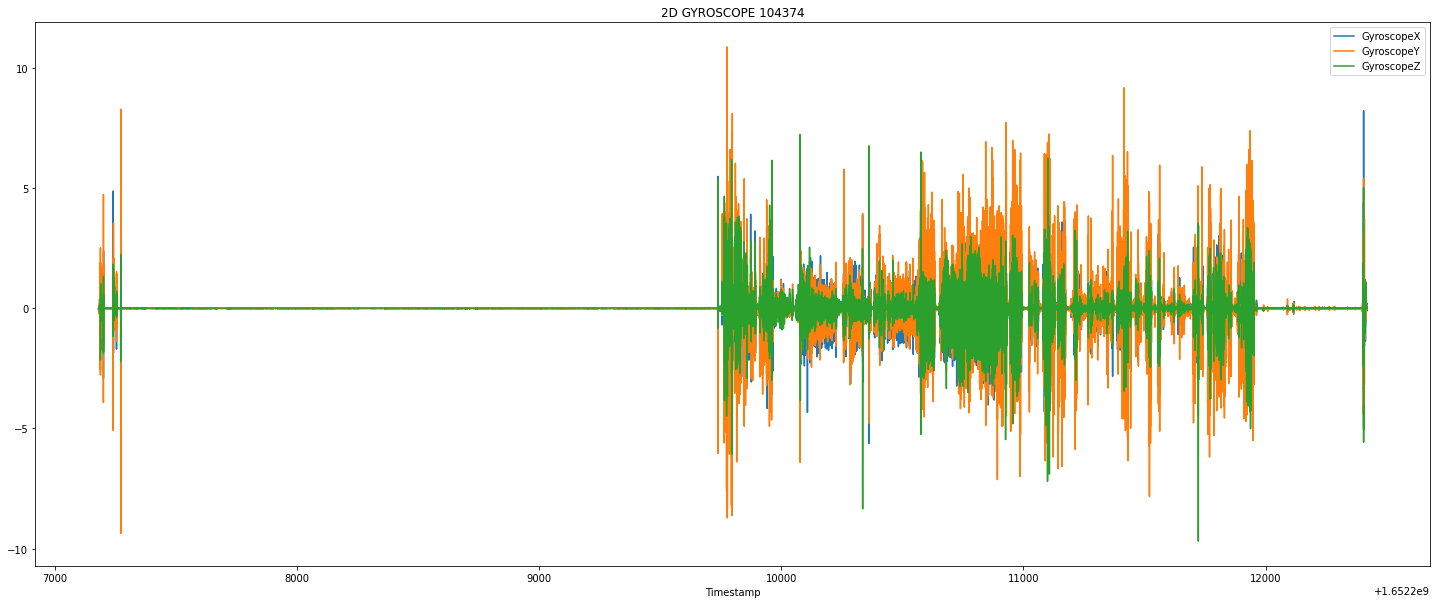

<Figure size 432x288 with 0 Axes>

In [47]:
#@markdown #**Gyroscope Data en tiempo** 🎭

guardar_chart = True #@param {type:"boolean"}

totalpoints = df3d.shape[0]
title = f"2D GYROSCOPE {totalpoints}"
df3d.plot(x="Timestamp", y=["GyroscopeX", "GyroscopeY", "GyroscopeZ"],kind="line", figsize=(25, 10),
        title=title)
plt.show()

if guardar_chart:
  fname = f"2D_gyroscope_{totalpoints}.png"
  chartpath = os.path.join(imagespath,fname)

  plt.savefig(chartpath)


In [48]:
#@markdown #**Interactive Display ** 🎭

#@markdown #**3D gyroscope data** 🎭

width = 900 #@param {type:"integer"}
height = 900 #@param {type:"integer"}
guardar_chart = True #@param {type:"boolean"}
exportar_puntos = True #@param {type:"boolean"}

import plotly.graph_objects as go
import numpy as np

totalpoints = df3d.shape[0]
fig = go.Figure(data=[go.Scatter3d(x=df3d["GyroscopeX"], y=df3d["GyroscopeY"], z=df3d["GyroscopeZ"],
                                   mode='markers',
                                   text= df3d['DeviceOrientation'],
                                   marker=dict(
                                    size=2,
                                    color=df3d['labels'],                # set color to an array/list of desired values
                                    colorscale='Viridis',   # choose a colorscale
                                    opacity=0.8, 
                                ))])

title = f"3D mapping of Gyroscope, TOTAL POINTS: {totalpoints}"
# tight layout
"""
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(title=title,height=height, width=width)
fig.show()
"""
fig.update_layout(title=title, autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=width, height=height,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()
if guardar_chart:
  fname = f"3d_gyroscope.png"
  chartpath = os.path.join(imagespath,fname)

  fig.write_image(chartpath,engine="kaleido")

if exportar_puntos:
  fullpath = os.path.join(datapath,"3d_gyroscope.csv")
  df3d.to_csv(fullpath)